In [7]:
import pandas as pd

In [17]:
url = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/McDonald_s_Reviews.json'
df = pd.read_csv(url)
# Display the first 5 rows of the DataFrame airports
df.head(5)

reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                                              review   rating  
0  Why does it look like someone spit on my food?...   1 star  
1  It'd McDonalds. It is what it is as far as the...  4 stars  
2  Made a mobile order got to the speaker and che...   1 star  
3  My mc. Crispy chicken sandwich was �����������...  5 stars  
4  I repeat my order 3 times in the drive thru, a...   1 star

In [9]:
pip install twython

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for oauthlib>=3.0.0 from https://files.pythonhosted.org/packages/7e/80/cab10959dc1faead58dc8384a781dfbf93cb4d33d50988f7a69f1b7c9bbe/oauthlib-3.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import operator
from colorama import Fore, init
import plotly.express as px

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...


In [11]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 13.3 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [15]:
df = pd.read_csv("/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv", encoding="latin-1")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv'

<Axes: >

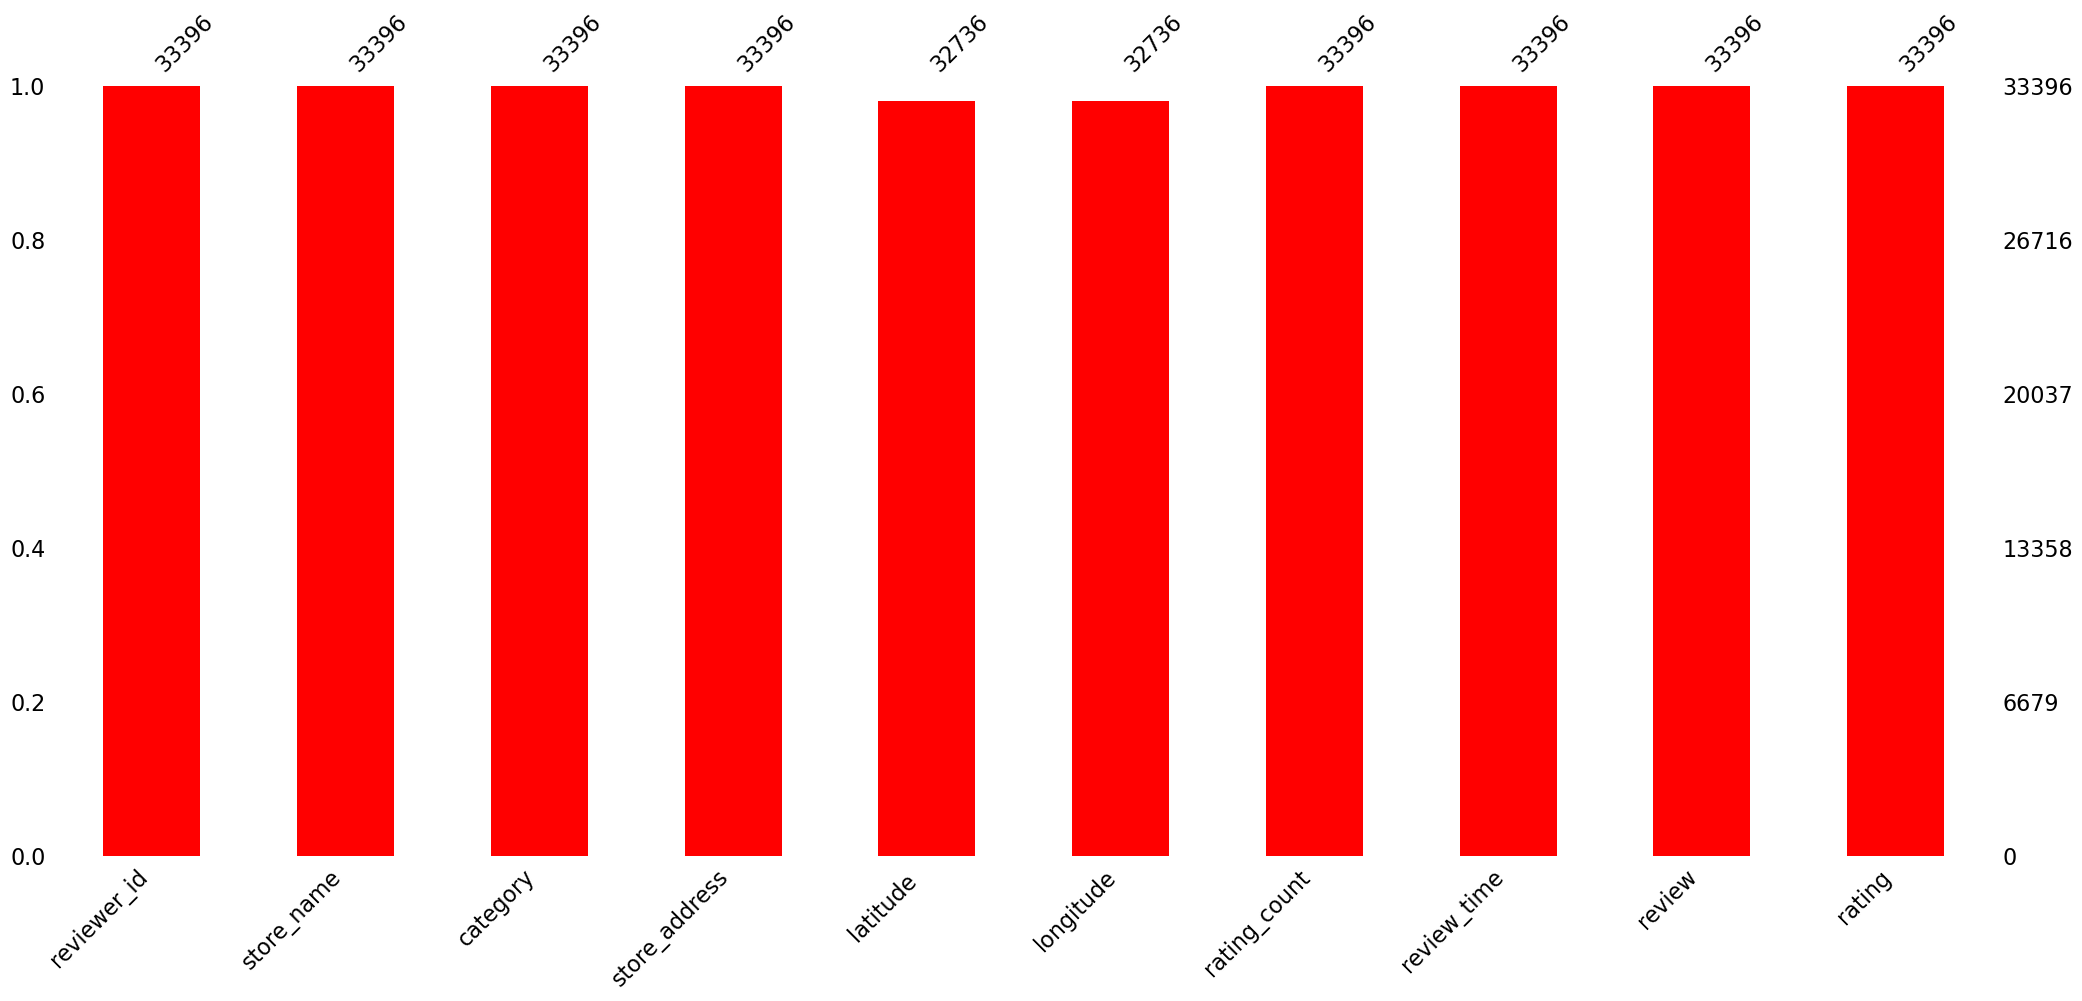

In [18]:
msno.bar(df, color = 'r')

In [19]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='turbo',low=0.1,high=0.01)
null_count()

In [20]:
df.duplicated().sum()

0

In [21]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [22]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

reviewer_id: 33396 distinct values
store_name: 2 distinct values
category: 1 distinct values
store_address: 40 distinct values
latitude : 40 distinct values
longitude: 40 distinct values
rating_count: 51 distinct values
review_time: 39 distinct values
review: 22281 distinct values
rating: 5 distinct values


In [23]:
df[df.isnull().any(axis = 1)]

reviewer_id     store_name              category  \
22141        22142     McDonald's  Fast food restaurant   
22142        22143     McDonald's  Fast food restaurant   
22143        22144     McDonald's  Fast food restaurant   
22144        22145     McDonald's  Fast food restaurant   
22145        22146     McDonald's  Fast food restaurant   
...            ...            ...                   ...   
27719        27720  ���McDonald's  Fast food restaurant   
27720        27721     McDonald's  Fast food restaurant   
27721        27722     McDonald's  Fast food restaurant   
27722        27723     McDonald's  Fast food restaurant   
27723        27724     McDonald's  Fast food restaurant   

                 store_address  latitude   longitude rating_count  \
22141  2476 Kal���������������        NaN        NaN        2,175   
22142  2476 Kal���������������        NaN        NaN        2,175   
22143  2476 Kal���������������        NaN        NaN        2,175   
22144  2476 Kal���������������        NaN        NaN        2,175   
22145  2476 Kal���������������        NaN        NaN        2,175   
...                        ...        ...        ...          ...   
27719  2476 Kal���������������        NaN        NaN        2,175   
27720  2476 Kal���������������        NaN        NaN        2,175   
27721  2476 Kal���������������        NaN        NaN        2,175   
27722  2476 Kal���������������        NaN        NaN        2,175   
27723  2476 Kal���������������        NaN        NaN        2,175   

         review_time                                             review  \
22141   3 months ago  Breakfast specials are good. The sausage burri...   
22142     a year ago  This isn't your typical McDonald's. This place...   
22143    2 weeks ago  This place was serving good quality breakfast ...   
22144    a month ago  I understand this is a very busy location but ...   
22145   2 months ago  When I arrived at McDonald's, it was very crow...   
...              ...                                                ...   
27719    3 years ago  This McDonald's is across the street from Waik...   
27720  11 months ago  Seems like, they always makes some mistakes wh...   
27721  11 months ago  Convenient to the east end of Kalakaua Ave. Lo...   
27722  11 months ago  Lost McDonald's in Honolulu, if you can avoid ...   
27723   8 months ago  Everytime I visit Waikiki for a vacation this ...   

        rating  
22141  4 stars  
22142  5 stars  
22143  4 stars  
22144   1 star  
22145  4 stars  
...        ...  
27719  5 stars  
27720  2 stars  
27721  4 stars  
27722   1 star  
27723   1 star  

[660 rows x 10 columns]

In [24]:
df = df.dropna()

In [25]:
df1 = df.copy()

In [26]:
# Drop columns 'store_name', 'category', 'latitude', 'longitude', and 'rating_count'
df1 = df1.drop(columns=['reviewer_id','store_name', 'category', 'latitude ', 'longitude', 'rating_count'])

In [27]:
df1.head(2)

store_address   review_time  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  3 months ago   
1  13749 US-183 Hwy, Austin, TX 78750, United States    5 days ago   

                                              review   rating  
0  Why does it look like someone spit on my food?...   1 star  
1  It'd McDonalds. It is what it is as far as the...  4 stars

In [28]:
df1[['store_address']].sample(5)

store_address
18019  702-2 Haddonfield-Berlin Rd, Voorhees Township...
12492     1044 US-11, Champlain, NY 12919, United States
18055  702-2 Haddonfield-Berlin Rd, Voorhees Township...
32042  632 S R L Thornton Freeway Service Rd, Dallas,...
15452       8500 US-290, Austin, TX 78724, United States

In [29]:
df1[['City', 'State']] = df1['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [30]:
df1[['City','State']].sample(5)

City     State
24927    Annandale  VA 22003
12856  Los Angeles  CA 90044
26195        Miami  FL 33137
31805       Dallas  TX 75203
19389       Newark  NJ 07104

In [31]:
df1 = df1.drop(columns=['store_address'])

In [32]:
df1[['review_time']].sample(5)

review_time
26935  2 years ago
18025  3 years ago
2801   4 years ago
8878   9 years ago
11531  5 years ago

In [33]:
df1[['rating']].sample(5)

rating
5493    1 star
31702  4 stars
7021   5 stars
30342   1 star
13776  5 stars

In [34]:
df1.insert(5, "Star", df1["rating"].str.split(" ").str[0])

In [35]:
df1[['Star']].sample(5)

Star
25970    2
6839     3
25513    1
9926     5
21392    1

In [36]:
df1 = df1.drop(columns=['rating'])

In [37]:
unique_review = df1['review'].unique()
unique_review

array(['Why does it look like someone spit on my food?\r\nI had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.',
       "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",
       'Made a mobile order got to the speaker and checked it in.\r\nLine was not moving so I had to leave otherwise I���������������������������d be late for work.\r\nNever got the refund in the app.\r\nI called them and they said I could only get my money back in person because it was stuck in the system.\r\nWent there in person the next day  and the manager told me she wasn�',
       ..., 'To remove hunger is enough',
       "It's good, but lately it has become very expen

In [38]:
def clean_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    stop_words = set(stopwords.words('english'))
    review_tokens = nltk.word_tokenize(review)
    review = ' '.join([word for word in review_tokens if word not in stop_words])

   
    return review

df1['clean_reviews'] = df1['review'].apply(clean_review)

print(df1[['clean_reviews']])

                                           clean_reviews
0      look like someone spit food normal transaction...
1      itd mcdonalds far food atmosphere go staff mak...
2      made mobile order got speaker checked line mov...
3      mc crispy chicken sandwich customer service qu...
4      repeat order times drive thru still manage mes...
...                                                  ...
33391                                      treated badly
33392                                       service good
33393                               remove hunger enough
33394                       good lately become expensive
33395                                     took good care

[32736 rows x 1 columns]


In [39]:
df1 = df1.drop(columns=['review'])

In [40]:
specified_columns = ['City', 'State', 'review_time', 'Star']

for col in specified_columns:
    total_unique_values = df1[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df1[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n') 

Total unique values for City: 26
New York: 3486
Orlando: 3090
Austin: 1726
Kissimmee: 1720
North Hollywood: 1710
Fern Park: 1700
Dallas: 1650
Miami: 1570
Newark: 1290
San Diego: 1230
Roanoke: 1168
Queens: 1140
Los Angeles: 1034
Las Vegas: 1030
Brodheadsville: 1028
Voorhees Township: 943
Salt Lake City: 890
Fort Worth: 850
Santa Monica: 820
Sunnyvale: 800
Oak Park: 751
Washington: 683
San Antonio: 635
Champlain: 620
Annandale: 602
Miami Beach: 570


Total unique values for State: 36
FL 32819: 2380
NY 10001: 2070
FL 34746: 1720
CA 91602: 1710
FL 32730: 1700
TX 75203: 1650
FL 33137: 1570
NJ 07104: 1290
TX 76262: 1168
NY 10003: 1140
NY 11367: 1140
NV 89119: 1030
PA 18322: 1028
NJ 08043: 943
TX 78724: 926
UT 84106: 890
TX 76177: 850
CA 90405: 820
TX 78750: 800
CA 94086: 800
IL 60302: 751
FL 32837: 710
DC 20036: 680
CA 92109: 680
TX 78257: 635
NY 12919: 620
VA 22003: 602
FL 33139: 570
CA 92111: 550
CA 90021: 550
CA 90044: 481
NY 10013: 270
CA 90025: 3
DC 20004: 3
NY 10038: 3
NY 10002: 3


To

In [41]:
df2 = df1.copy()

In [42]:
df2.head(2)

review_time    City     State Star  \
0  3 months ago  Austin  TX 78750    1   
1    5 days ago  Austin  TX 78750    4   

                                       clean_reviews  
0  look like someone spit food normal transaction...  
1  itd mcdonalds far food atmosphere go staff mak...

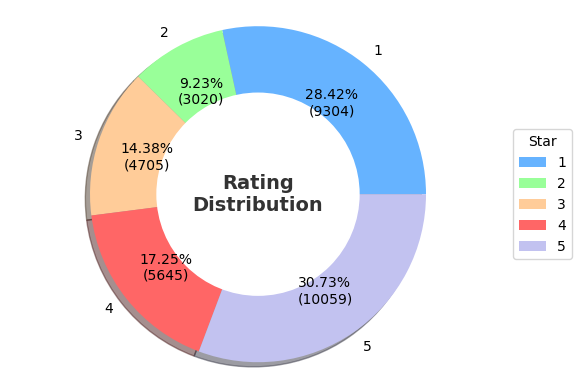

In [43]:
unique_star = df1['Star'].unique()

explode = [0] * len(unique_star)

sentiment_counts = df2.groupby("Star").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0']  

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Rating\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Star", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

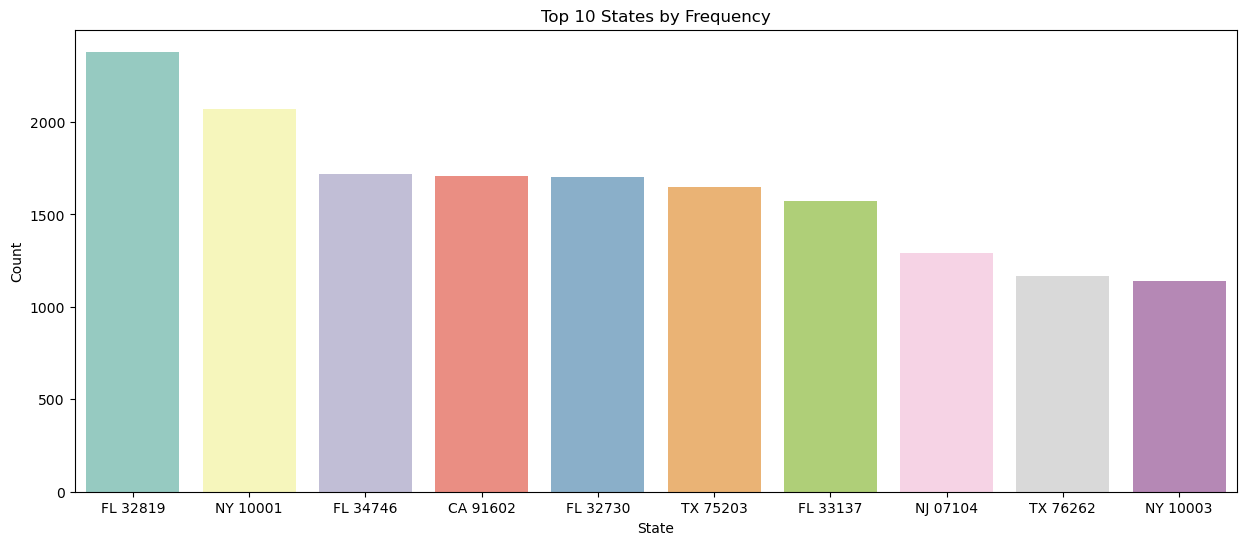

In [44]:
top_10_states = df2['State'].value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
sns.set_palette("Set3")  
sns.countplot(x='State', data=df2, order=top_10_states.index)
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

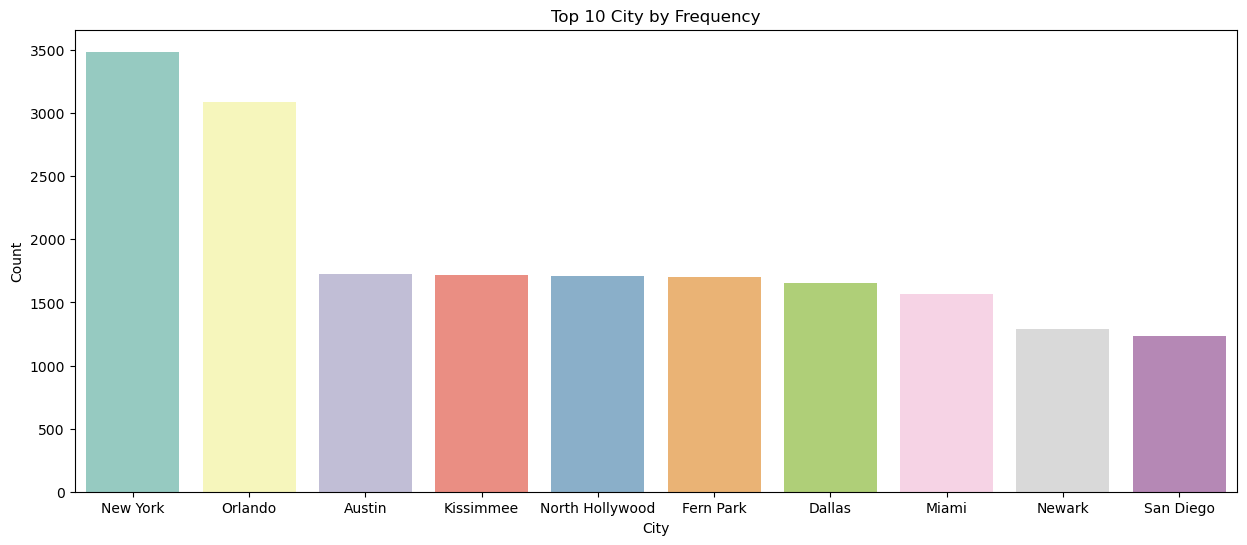

In [45]:
top_10_city = df2['City'].value_counts().nlargest(10)

plt.figure(figsize=(15, 6))
sns.set_palette("Set3")  
sns.countplot(x='City', data=df2, order=top_10_city.index)
plt.title('Top 10 City by Frequency')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

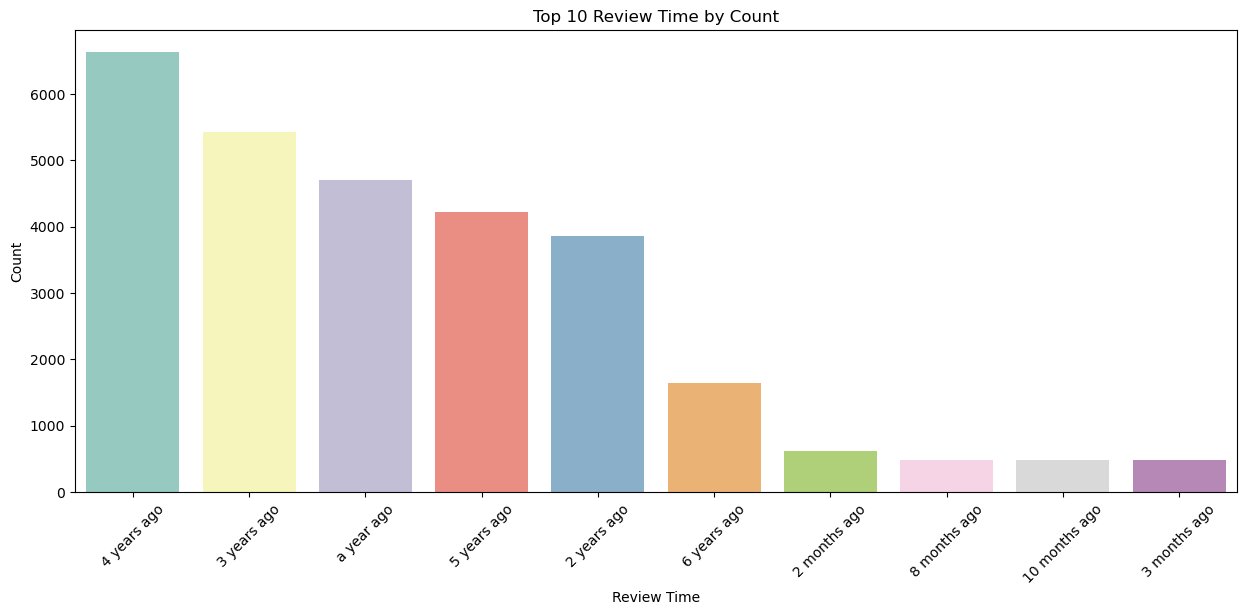

In [46]:
plt.figure(figsize=(15, 6))
sns.set_palette("Set3")
sns.countplot(x='review_time', data=df2, order=df2['review_time'].value_counts().iloc[:10].index)
plt.title('Top 10 Review Time by Count')
plt.xlabel('Review Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

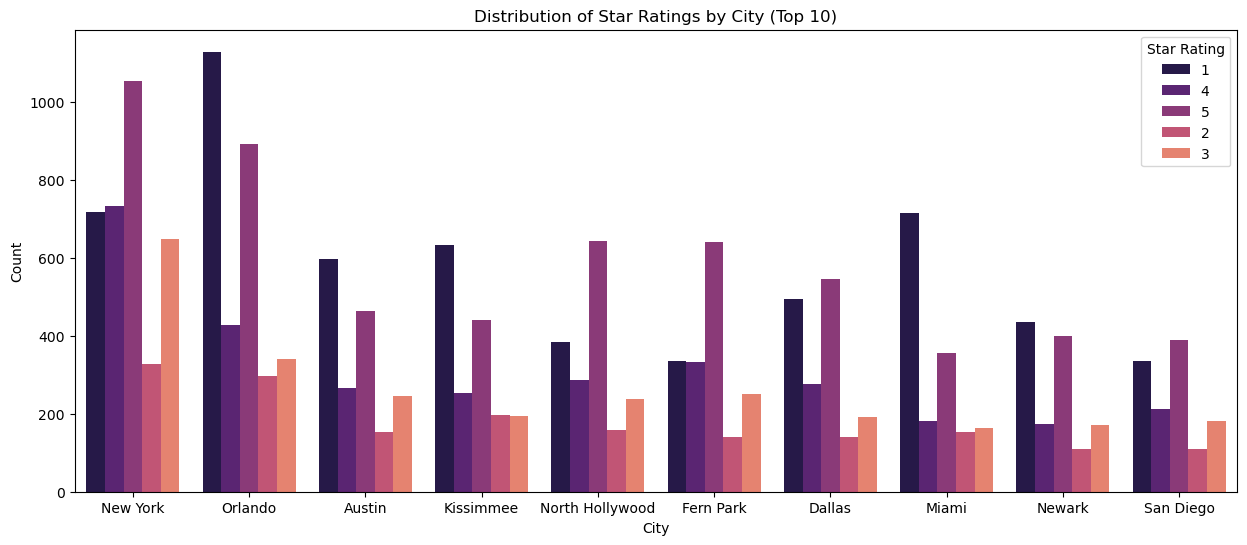

In [47]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='City', hue='Star', data=df2, order=df2['City'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

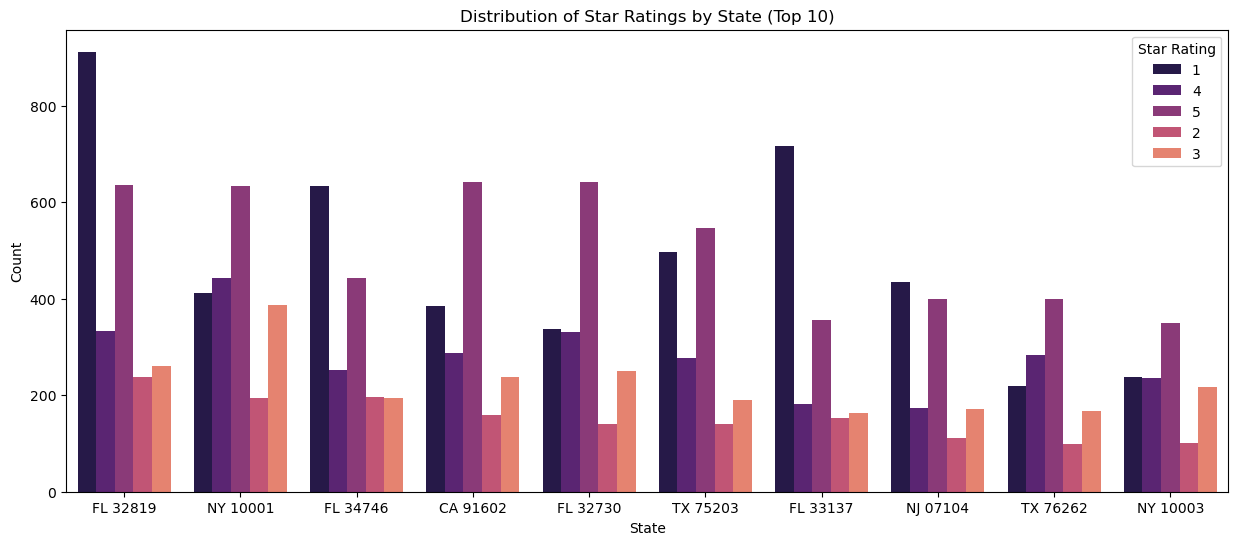

In [48]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='State', hue='Star', data=df2, order=df2['State'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

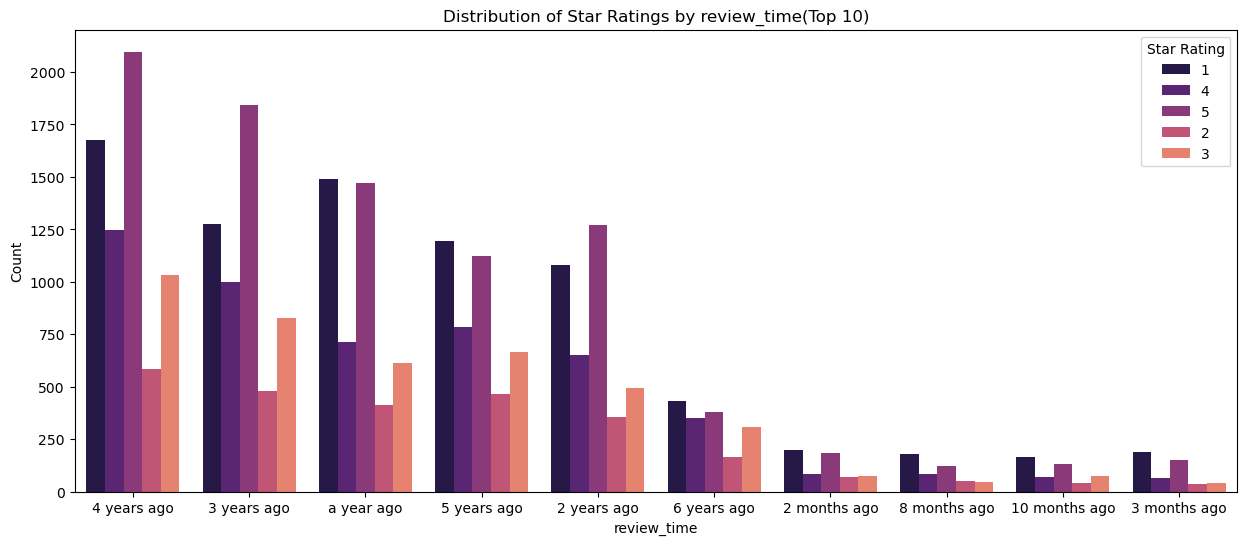

In [49]:
plt.figure(figsize=(15, 6))
sns.set_palette("magma") 
sns.countplot(x='review_time', hue='Star', data=df2, order=df2['review_time'].value_counts().iloc[:10].index)
plt.title('Distribution of Star Ratings by review_time(Top 10)')
plt.xlabel('review_time')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Star Rating')
plt.show()

In [50]:
df3 = df2.copy()

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32736 entries, 0 to 33395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_time    32736 non-null  object
 1   City           32736 non-null  object
 2   State          32736 non-null  object
 3   Star           32736 non-null  object
 4   clean_reviews  32736 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [52]:
df3 = df3[["Star","clean_reviews"]]
df3.head(2)

Star                                      clean_reviews
0    1  look like someone spit food normal transaction...
1    4  itd mcdonalds far food atmosphere go staff mak...

In [53]:
analyzer = SentimentIntensityAnalyzer()

df3['sentiment_score'] = df3['clean_reviews'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df3[['clean_reviews', 'sentiment_score', 'sentiment']].head())

                                       clean_reviews  sentiment_score  \
0  look like someone spit food normal transaction...           0.5541   
1  itd mcdonalds far food atmosphere go staff mak...           0.8591   
2  made mobile order got speaker checked line mov...          -0.2960   
3  mc crispy chicken sandwich customer service qu...           0.0000   
4  repeat order times drive thru still manage mes...          -0.7184   

  sentiment  
0  positive  
1  positive  
2  negative  
3   neutral  
4  negative  


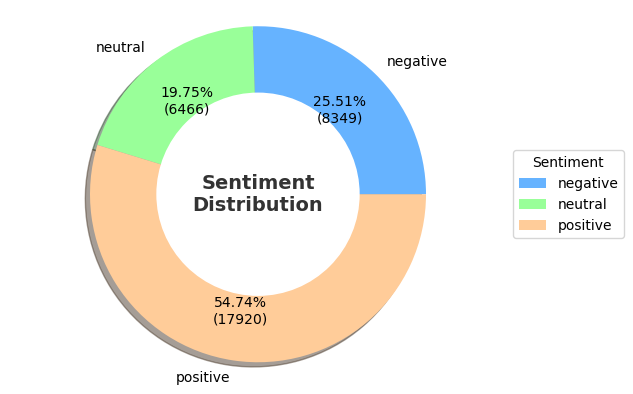

In [54]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

In [55]:
df3["word_count"] = df3['clean_reviews'].str.len()

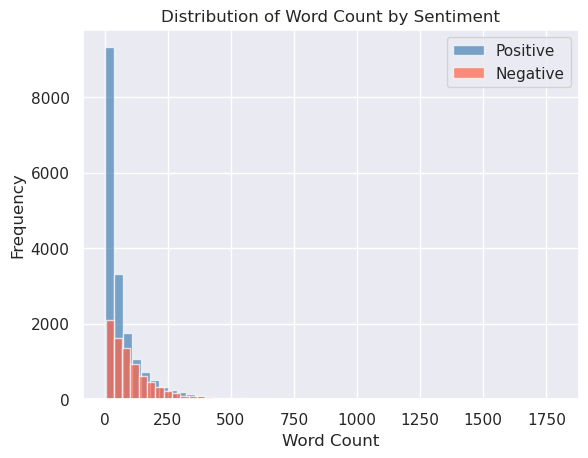

In [56]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

positive_reviews = df3[df3["sentiment"] == 'positive']  
negative_reviews = df3[df3["sentiment"] == 'negative'] 

sns.distplot(positive_reviews['word_count'], color='steelblue', label='Positive', kde=False, hist_kws={'alpha': 0.7})
sns.distplot(negative_reviews['word_count'], color='tomato', label='Negative', kde=False, hist_kws={'alpha': 0.7})

plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [57]:
df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

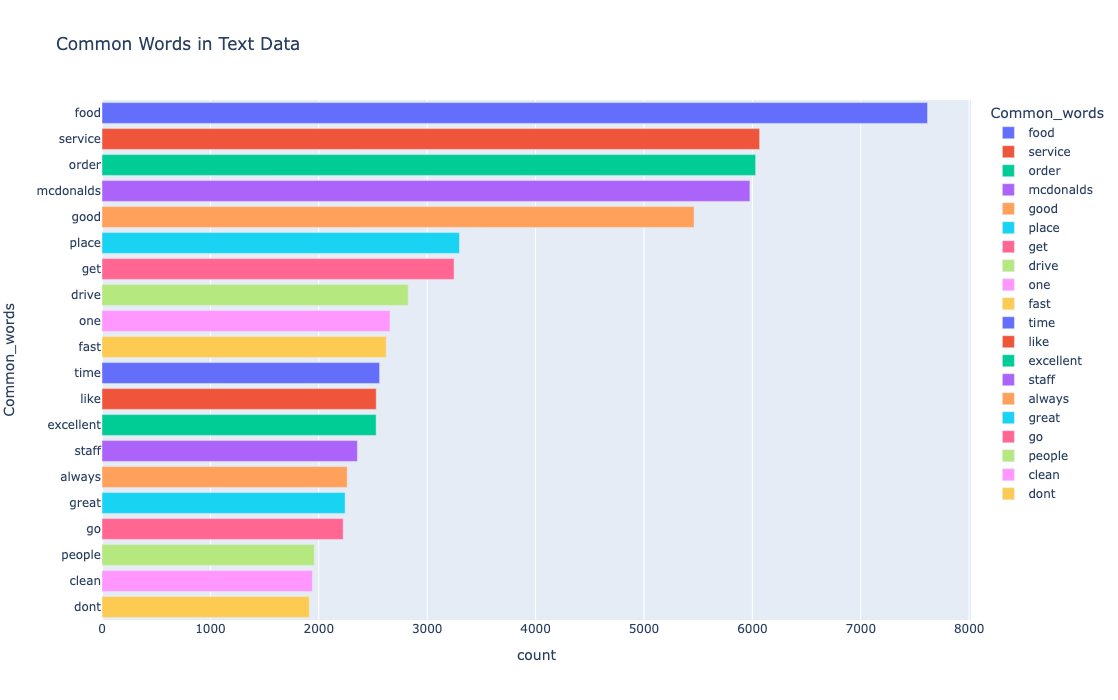

In [58]:
df3['temp_list'] = df3['clean_reviews'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [59]:
Positive_sent = df3[df3['sentiment'] == 'positive']
Negative_sent = df3[df3['sentiment'] == 'negative']
Neutral_sent = df3[df3['sentiment'] == 'neutral']

In [61]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

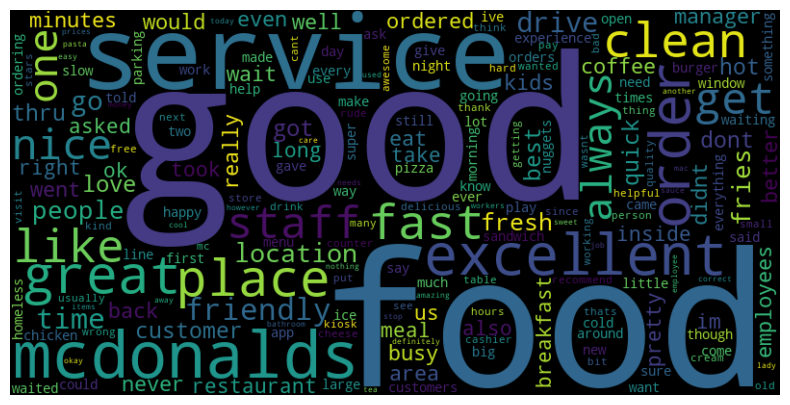

In [62]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

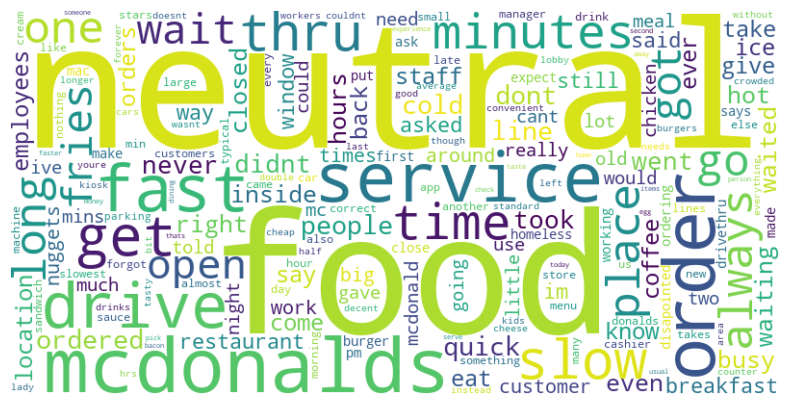

In [64]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

# Create a wordcloud_data dictionary
wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [65]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')

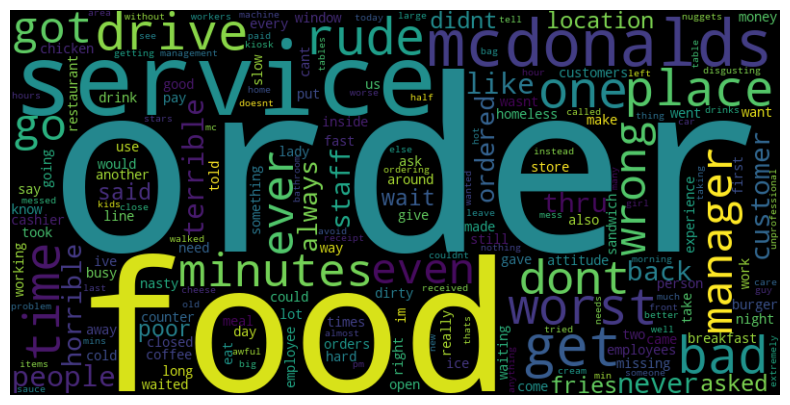

In [66]:
top = Counter([item for sublist in df3[df3['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_negative.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
df4 = df3.copy()

In [68]:
X = df4['clean_reviews']
y = df4['sentiment']

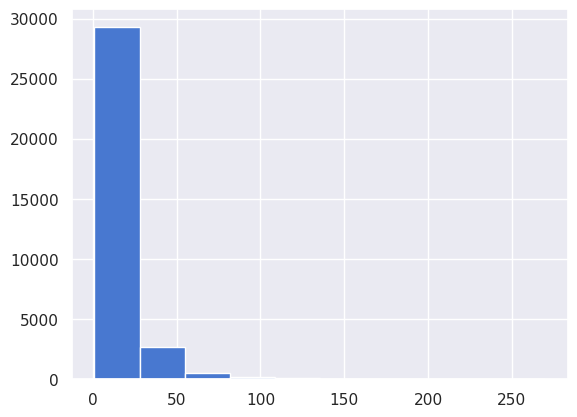

In [69]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())
svc_pipeline = make_pipeline(TfidfVectorizer(), SVC())
bernoulli_nb_pipeline = make_pipeline(TfidfVectorizer(), BernoulliNB())
logistic_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())
pa_pipeline = make_pipeline(TfidfVectorizer(), PassiveAggressiveClassifier())

In [72]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [73]:
nb_predictions = nb_pipeline.predict(X_test)

In [74]:
print("Multinomial Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))

Multinomial Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.83      0.75      0.79      1721
     neutral       0.98      0.22      0.37      1244
    positive       0.73      0.96      0.83      3583

    accuracy                           0.77      6548
   macro avg       0.85      0.65      0.66      6548
weighted avg       0.81      0.77      0.73      6548



In [75]:
pa_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('passiveaggressiveclassifier', PassiveAggressiveClassifier())])

In [76]:
pa_predictions = pa_pipeline.predict(X_test)

In [77]:
print("Passive Aggressive Classifier:")
print(classification_report(y_test, pa_predictions))

Passive Aggressive Classifier:
              precision    recall  f1-score   support

    negative       0.88      0.87      0.88      1721
     neutral       0.88      0.91      0.90      1244
    positive       0.95      0.94      0.94      3583

    accuracy                           0.92      6548
   macro avg       0.90      0.91      0.91      6548
weighted avg       0.92      0.92      0.92      6548



In [78]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [79]:
svc_predictions = svc_pipeline.predict(X_test)